/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Epoch 1/50


/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7585 - loss: 0.3493 - val_accuracy: 0.7600 - val_loss: 0.3527
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.8239 - loss: 0.3140 - val_accuracy: 0.8150 - val_loss: 0.3213
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8748 - loss: 0.2631 - val_accuracy: 0.8450 - val_loss: 0.2918
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.8975 - loss: 0.2530 - val_accuracy: 0.8800 - val_loss: 0.2646
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.9327 - loss: 0.2122 - val_accuracy: 0.8850 - val_loss: 0.2400
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9395 - loss: 0.2036 - val_accuracy: 0.9100 - val_loss: 0.2169
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9417 - loss: 0.1939 - val_accuracy: 0.9500 - val_loss: 0.1958
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9588 - loss: 0.1681 - val_accuracy: 0.9550 - val_lo

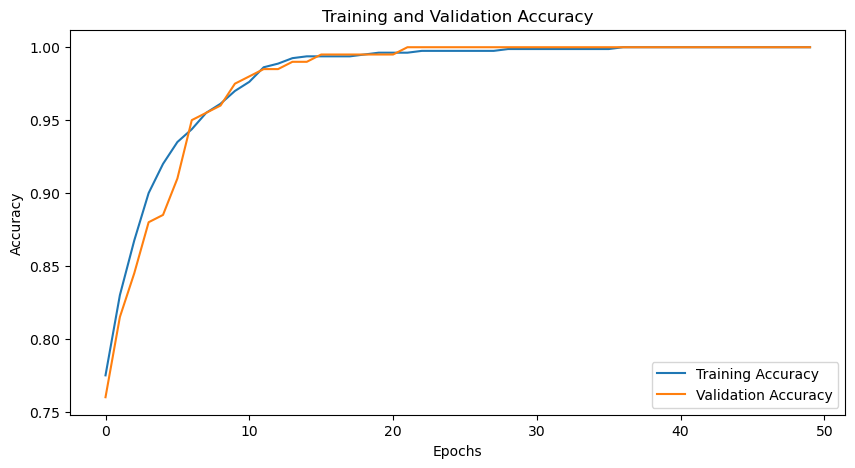

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Generate the Dataset
# Set seed for reproducibility
np.random.seed(42)

# Generate class 0
mean0 = [0, 0]
cov0 = [[1, 0], [0, 1]]
class0 = np.random.multivariate_normal(mean0, cov0, 500)
labels0 = np.zeros(500)

# Generate class 1
mean1 = [5, 5]
cov1 = [[1, 0], [0, 1]]
class1 = np.random.multivariate_normal(mean1, cov1, 500)
labels1 = np.ones(500)

# Combine the data
X = np.vstack((class0, class1))
y = np.hstack((labels0, labels1))

# Shuffle and split the data into training and testing sets
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the Neural Network
# Choose a simple MLP architecture for binary classification
model = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),  # Hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')                   # Output layer for binary classification with sigmoid activation
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the Model
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 4: Evaluate the Model
# Predict on the test set and calculate evaluation metrics
y_pred_prob = model.predict(X_test).ravel()      # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype(int)         # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()